# Import Data - FIFA 2018 Player Dataset

In [9]:
import pandas as pd
data = pd.read_csv('CompleteDataset.csv', low_memory=False)
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data
## Feature Noise


In [10]:
columns_needed = data.drop(['Unnamed: 0','Age','Photo', 'Flag', 'Club Logo', 'CAM','CB','CDM','CF','CM','ID','LAM','LB','Preferred Positions','RAM','LCB','LCM','LDM','LF','LM','LS','LW','LWB', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], axis=1)

def handle_calculations(digit_str):
    cell = digit_str.split('+')
    if len(cell) == 1:
        cell = digit_str.split('-')
        cell = list(map(int, cell))
        return cell[0] - cell[1]
    else:
        cell = list(map(int, cell))
        return sum(cell)

# Handling attribute noise e.g. 71+9 for a certain skill

pd.options.mode.chained_assignment = None
none_essential_features = ['Name','Overall','Nationality', 'Potential','Club', 'Value', 'Wage', 'Special']
features = [feature for feature in columns_needed.columns.tolist() if feature not in none_essential_features]

for feature in features:
    columns_needed[feature] = columns_needed[feature].apply(lambda x: handle_calculations(x) if len(x) > 2 else x)

### Duplicates

In [11]:
columns_needed[columns_needed.duplicated()]
columns_needed_no_duplicates = columns_needed.drop_duplicates() # Removing exact duplicates, default keeping first entry
columns_needed_no_duplicates.groupby(['Name', 'Nationality', 'Club']).size()

Name              Nationality   Club                     
A. Abbas          Iraq          Wellington Phoenix           1
                  Saudi Arabia  Al Faisaly                   1
A. Abdallah       France        ES Troyes AC                 1
A. Abdennour      Tunisia       Olympique de Marseille       1
A. Abdi           Switzerland   Sheffield Wednesday          1
A. Abedzadeh      Iran          CS Marítimo                  1
A. Abrashi        Albania       SC Freiburg                  1
A. Absalem        Netherlands   FC Groningen                 1
A. Accardi        Italy         Palermo                      1
A. Acosta         Mexico        Tigres U.A.N.L.              1
                                U.N.A.M.                     1
A. Acquah         Ghana         Torino                       1
A. Adamov         Russia        Terek Grozny                 1
A. Adanuy         Chile         CD Huachipato                1
A. Adencibia      Chile         CD Palestino                

### Duplicates Partial

In [12]:
columns_needed_no_duplicates = columns_needed_no_duplicates.drop_duplicates(subset=['Name', 'Nationality', 'Club']) # Removing partial duplicates
columns_needed_no_duplicates.groupby(['Name', 'Nationality', 'Club']).size()

Name              Nationality   Club                     
A. Abbas          Iraq          Wellington Phoenix           1
                  Saudi Arabia  Al Faisaly                   1
A. Abdallah       France        ES Troyes AC                 1
A. Abdennour      Tunisia       Olympique de Marseille       1
A. Abdi           Switzerland   Sheffield Wednesday          1
A. Abedzadeh      Iran          CS Marítimo                  1
A. Abrashi        Albania       SC Freiburg                  1
A. Absalem        Netherlands   FC Groningen                 1
A. Accardi        Italy         Palermo                      1
A. Acosta         Mexico        Tigres U.A.N.L.              1
                                U.N.A.M.                     1
A. Acquah         Ghana         Torino                       1
A. Adamov         Russia        Terek Grozny                 1
A. Adanuy         Chile         CD Huachipato                1
A. Adencibia      Chile         CD Palestino                

## Change Data type

In [13]:
columns_needed_no_duplicates.dtypes

Name                  object
Nationality           object
Overall                int64
Potential              int64
Club                  object
Value                 object
Wage                  object
Special                int64
Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power    

In [14]:
columns_needed_no_duplicates[features] = columns_needed_no_duplicates[features].apply(pd.to_numeric, errors='coerce',downcast='integer',axis=1)
columns_needed_no_duplicates.dtypes

Name                  object
Nationality           object
Overall                int64
Potential              int64
Club                  object
Value                 object
Wage                  object
Special                int64
Acceleration            int8
Aggression              int8
Agility                 int8
Balance                 int8
Ball control            int8
Composure               int8
Crossing                int8
Curve                   int8
Dribbling               int8
Finishing               int8
Free kick accuracy      int8
GK diving               int8
GK handling             int8
GK kicking              int8
GK positioning          int8
GK reflexes             int8
Heading accuracy        int8
Interceptions           int8
Jumping                 int8
Long passing            int8
Long shots              int8
Marking                 int8
Penalties               int8
Positioning             int8
Reactions               int8
Short passing           int8
Shot power    

## Label Noise

In [15]:
def convert_currency(currency_str):
    currency_str = currency_str.replace("€","").replace("K","000").replace("M","000000")
    if "." not in currency_str:
        return currency_str
    else:
        currency_str = currency_str.replace(".","")
        currency_str = currency_str[:-1]
        return currency_str

columns_needed_no_duplicates['Value'] = columns_needed_no_duplicates['Value'].apply(convert_currency).apply(pd.to_numeric, errors='coerce',downcast='integer')
columns_needed_no_duplicates['Wage'] = columns_needed_no_duplicates['Wage'].apply(convert_currency).apply(pd.to_numeric, errors='coerce',downcast='integer')

In [16]:
columns_needed_no_duplicates

,Name,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,Portugal,94,94,Real Madrid CF,95500000,565000,2228,89,63,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,Argentina,93,93,FC Barcelona,105000000,565000,2154,92,48,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,Brazil,92,94,Paris Saint-Germain,123000000,280000,2100,94,56,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,Uruguay,92,92,FC Barcelona,97000000,510000,2291,88,78,...,93,83,87,38,77,89,45,80,84,88
4,M. Neuer,Germany,92,92,FC Bayern Munich,61000000,230000,1493,58,29,...,85,55,25,11,61,44,10,83,70,11
5,R. Lewandowski,Poland,91,91,FC Bayern Munich,92000000,355000,2143,79,80,...,91,83,88,19,83,79,42,84,78,87
6,De Gea,Spain,90,92,Manchester United,64500000,215000,1458,57,38,...,88,50,31,13,58,40,21,64,68,13
7,E. Hazard,Belgium,90,91,Chelsea,90500000,295000,2096,93,54,...,85,86,79,22,87,79,27,65,86,79
8,T. Kroos,Germany,90,90,Real Madrid CF,79000000,340000,2165,60,60,...,86,90,87,69,52,77,82,74,88,82
9,G. Higuaín,Argentina,90,90,Juventus,77000000,275000,1961,78,50,...,88,75,88,18,80,72,22,85,70,88


In [17]:
columns_needed_no_duplicates.apply(lambda x: (x != 0).all()) # Label noise in Value and Wage!

Name                   True
Nationality            True
Overall                True
Potential              True
Club                   True
Value                 False
Wage                  False
Special                True
Acceleration           True
Aggression             True
Agility                True
Balance                True
Ball control           True
Composure              True
Crossing               True
Curve                  True
Dribbling              True
Finishing              True
Free kick accuracy     True
GK diving              True
GK handling            True
GK kicking             True
GK positioning         True
GK reflexes            True
Heading accuracy       True
Interceptions          True
Jumping                True
Long passing           True
Long shots             True
Marking                True
Penalties              True
Positioning            True
Reactions              True
Short passing          True
Shot power             True
Sliding tackle      

In [18]:
# Domain knowledge: If a player doesn't belong to a club the player has no Value or Wage
# Hence 0 in Wage and Value must be removed
columns_needed_no_duplicates[pd.isnull(columns_needed_no_duplicates).any(axis=1)]

,Name,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
162,Oscar,Brazil,83,86,NaN,0,0,1961,75,31,...,81,83,76,47,74,76,50,36,83,63
167,Adrien Silva,Portugal,83,83,NaN,0,0,2174,64,79,...,77,83,83,73,65,89,78,62,85,75
274,A. Witsel,Belgium,82,82,NaN,0,0,2143,67,78,...,81,83,78,71,74,85,73,79,78,67
472,M. Berg,Sweden,80,80,NaN,0,0,1841,74,61,...,75,72,79,25,75,69,33,76,66,74
488,Renato Augusto,Brazil,80,80,NaN,0,0,2069,66,53,...,83,81,81,59,67,71,68,78,81,77
658,Gervinho,Ivory Coast,79,79,NaN,0,0,1871,91,51,...,75,71,69,15,92,90,29,55,74,70
925,B. Moukandjo,Cameroon,77,77,NaN,0,0,1904,90,51,...,76,71,78,19,91,70,20,65,65,72
944,B. Dočkal,Czech Republic,77,77,NaN,0,0,1964,68,59,...,74,79,78,38,66,66,52,57,81,72
1019,Gil,Brazil,77,77,NaN,0,0,1701,53,81,...,74,70,69,76,67,71,77,86,68,23
1273,C. Riveros,Paraguay,76,76,NaN,0,0,1999,60,72,...,72,81,71,62,53,75,61,62,77,64


In [19]:
columns_needed_no_duplicates_final = columns_needed_no_duplicates.drop(['Name', "Nationality", "Club"], axis=1)
columns_needed_no_duplicates_wage = columns_needed_no_duplicates_final.drop(['Value'], axis=1)
columns_needed_no_duplicates_value = columns_needed_no_duplicates_final.drop(['Wage'], axis=1)

In [20]:
print(columns_needed_no_duplicates_wage[columns_needed_no_duplicates_wage.Wage == 0].shape)
print(columns_needed_no_duplicates_wage.shape)

(247, 38)
(17911, 38)


In [21]:
print(columns_needed_no_duplicates_value[columns_needed_no_duplicates_value.Value == 0].shape)
print(columns_needed_no_duplicates_value.shape)

(255, 38)
(17911, 38)


In [22]:
columns_needed_no_duplicates_wage_clean = columns_needed_no_duplicates_wage[columns_needed_no_duplicates_wage.Wage != 0]
columns_needed_no_duplicates_value_clean = columns_needed_no_duplicates_value[columns_needed_no_duplicates_value.Value != 0]
print(columns_needed_no_duplicates_wage_clean.shape)
print(columns_needed_no_duplicates_value_clean.shape)

(17664, 38)
(17656, 38)


In [23]:
columns_needed_no_duplicates_wage_clean

,Overall,Potential,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,94,94,565000,2228,89,63,89,63,93,95,...,96,83,94,23,91,92,31,80,85,88
1,93,93,565000,2154,92,48,90,95,95,96,...,95,88,85,26,87,73,28,59,90,85
2,92,94,280000,2100,94,56,96,82,95,92,...,88,81,80,33,90,78,24,53,80,83
3,92,92,510000,2291,88,78,86,60,91,83,...,93,83,87,38,77,89,45,80,84,88
4,92,92,230000,1493,58,29,52,35,48,70,...,85,55,25,11,61,44,10,83,70,11
5,91,91,355000,2143,79,80,78,80,89,87,...,91,83,88,19,83,79,42,84,78,87
6,90,92,215000,1458,57,38,60,43,42,64,...,88,50,31,13,58,40,21,64,68,13
7,90,91,295000,2096,93,54,93,91,92,87,...,85,86,79,22,87,79,27,65,86,79
8,90,90,340000,2165,60,60,71,69,89,85,...,86,90,87,69,52,77,82,74,88,82
9,90,90,275000,1961,78,50,75,69,85,86,...,88,75,88,18,80,72,22,85,70,88


In [24]:
columns_needed_no_duplicates_value_clean

,Overall,Potential,Value,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,94,94,95500000,2228,89,63,89,63,93,95,...,96,83,94,23,91,92,31,80,85,88
1,93,93,105000000,2154,92,48,90,95,95,96,...,95,88,85,26,87,73,28,59,90,85
2,92,94,123000000,2100,94,56,96,82,95,92,...,88,81,80,33,90,78,24,53,80,83
3,92,92,97000000,2291,88,78,86,60,91,83,...,93,83,87,38,77,89,45,80,84,88
4,92,92,61000000,1493,58,29,52,35,48,70,...,85,55,25,11,61,44,10,83,70,11
5,91,91,92000000,2143,79,80,78,80,89,87,...,91,83,88,19,83,79,42,84,78,87
6,90,92,64500000,1458,57,38,60,43,42,64,...,88,50,31,13,58,40,21,64,68,13
7,90,91,90500000,2096,93,54,93,91,92,87,...,85,86,79,22,87,79,27,65,86,79
8,90,90,79000000,2165,60,60,71,69,89,85,...,86,90,87,69,52,77,82,74,88,82
9,90,90,77000000,1961,78,50,75,69,85,86,...,88,75,88,18,80,72,22,85,70,88


# Data Visualization

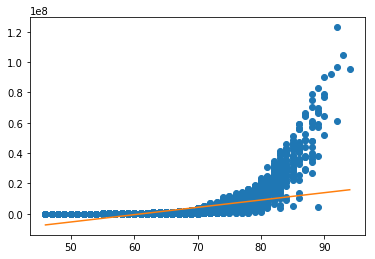

In [34]:
import matplotlib.pyplot as plt
import numpy as np
def plot(x, y):
    axis = plt.scatter(x, y)
    zed = np.polyfit(x, y, 1)
    poly = np.poly1d(zed)
    plt.plot(x, poly(x), "#ff7f0e")
    plt.show()
    
plot(x=columns_needed_no_duplicates_value_clean['Overall'], y=columns_needed_no_duplicates_value_clean['Value'])

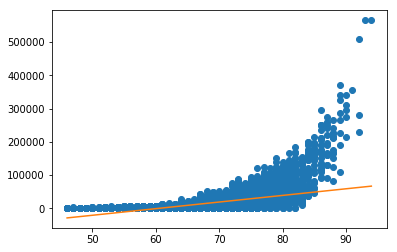

In [35]:
plot(x=columns_needed_no_duplicates_wage_clean['Overall'], y=columns_needed_no_duplicates_wage_clean['Wage'])

In [36]:
columns_needed_no_duplicates_wage_clean['LoggedWage'] = np.log(columns_needed_no_duplicates_wage_clean['Wage'])
columns_needed_no_duplicates_value_clean['LoggedValue'] = np.log(columns_needed_no_duplicates_value_clean['Value'])

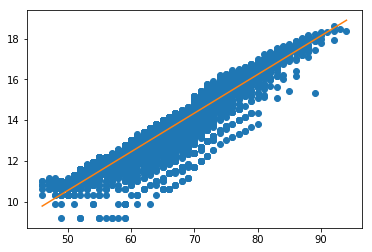

In [37]:
plot(x=columns_needed_no_duplicates_value_clean['Overall'], y=columns_needed_no_duplicates_value_clean['LoggedValue'])

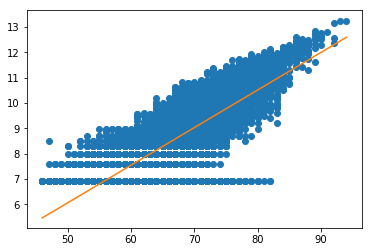

In [38]:
plot(x=columns_needed_no_duplicates_wage_clean['Overall'], y=columns_needed_no_duplicates_wage_clean['LoggedWage'])

In [27]:
columns_needed_no_duplicates_wage_clean.to_csv("player_set_wage.csv")
columns_needed_no_duplicates_value_clean.to_csv("player_set_value.csv")

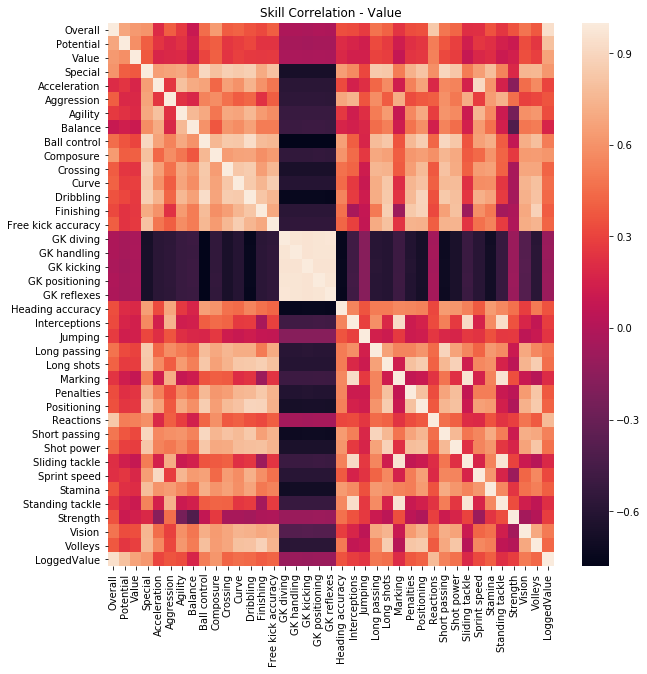

In [78]:
import seaborn as sns

corr_value = columns_needed_no_duplicates_value_clean.corr()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Skill Correlation - Value")
sns.heatmap(corr_value, 
            xticklabels=corr_value.columns.values,
            yticklabels=corr_value.columns.values, ax=ax)


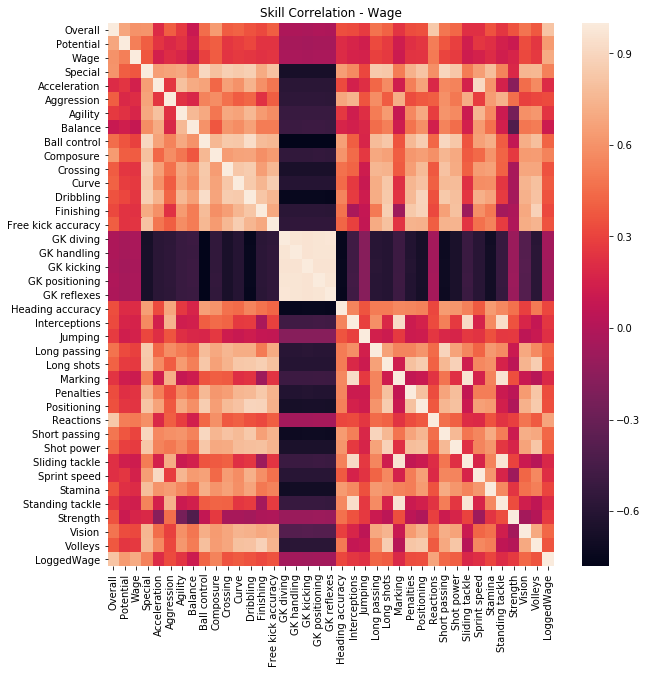

In [81]:
corr_wage = columns_needed_no_duplicates_wage_clean.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Skill Correlation - Wage")
sns.heatmap(corr_wage, 
            xticklabels=corr_wage.columns.values,
            yticklabels=corr_wage.columns.values, ax=ax)